### IMPORTING LIBRARIES

In [15]:
# Data Processing
import numpy as np
import pandas as pd
from collections import Counter

# Importing tde
import tde

# Visualization
import matplotlib.pyplot as plt

# Model and Performance
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report #for model performance evaluation

In [6]:
## READING MICE DATA
mice = pd.read_excel('/Users/yoddmena/Downloads/Research/Telemetry_edited/Ex01-05_06_19-Edited.xlsx')
mice.head()

,Minutes,Date,Time,B6-100 Exp. 1 MRSA Deg. C Data,B6-100 Exp. 1 MRSA Cnts Data,B6-101 Exp. 1 MRSA Deg. C Data,B6-101 Exp. 1 MRSA Cnts Data,CC002-557 Exp. 1 MRSA Deg. C Data,CC002-557 Exp. 1 MRSA Cnts Data,CC002-558 Exp. 1 MRSA Deg. C Data,...,CC015-392 Exp. 1 MRSA Deg. C Data,CC015-392 Exp. 1 MRSA Cnts Data,CC038-582 Exp. 1 MRSA Deg. C Data,CC038-582 Exp. 1 MRSA Cnts Data,CC038-583 Exp. 1 MRSA Deg. C Data,CC038-583 Exp. 1 MRSA Cnts Data,CC051-495 Exp. 1 MRSA Deg. C Data,CC051-495 Exp. 1 MRSA Cnts Data,CC051-496 Exp. 1 MRSA Deg. C Data,CC051-496 Exp. 1 MRSA Cnts Data
0,1,2019-04-26,13:10:47,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
1,2,2019-04-26,13:11:47,NaN,69.0,NaN,19.0,NaN,37.0,NaN,...,NaN,77.0,NaN,38.0,NaN,39.0,NaN,74.0,NaN,31.0
2,3,2019-04-26,13:12:47,37.54,8.0,37.82,46.0,37.50,60.0,37.79,...,39.34,64.0,38.80,42.0,38.37,67.0,38.16,39.0,38.02,19.0
3,4,2019-04-26,13:13:47,37.56,0.0,37.74,35.0,37.64,18.0,37.78,...,39.35,48.0,38.76,26.0,38.31,22.0,38.18,38.0,38.10,47.0
4,5,2019-04-26,13:14:47,37.50,0.0,37.74,62.0,37.77,13.0,37.72,...,39.36,20.0,38.59,15.0,38.25,23.0,38.16,45.0,38.14,34.0


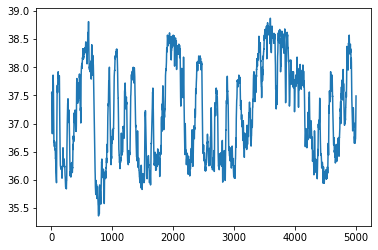

In [7]:
## Selecting columns and the first 5000 rows then plotting 
x = mice["Minutes"]
y = mice["B6-100 Exp. 1 MRSA Deg. C Data"]
plt.plot(x[:5000],y[:5000])

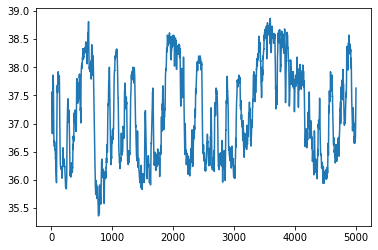

In [8]:
mask = y.notna() # will keep the true values
x1 = x[mask]
y1 = y[mask]
plt.plot(x1[:5000],y1[:5000])

In [9]:
len(x)-len(x1)

225

In [13]:
#Time Delay Embedding
X = tde.tde(y1)
X=X.T #transporting the data
X

array([[35.81, 36.78, 37.54],
       [35.78, 36.72, 37.56],
       [35.76, 36.68, 37.5 ],
       ...,
       [36.98, 35.76, 37.25],
       [36.98, 35.72, 37.24],
       [36.99, 35.73, 37.16]])

### TRAIN TEST SPLIT


In [48]:
model = svm.OneClassSVM()
#fit the data
model.fit(X[:5000])

#predict the data
outliers = model.predict(X[5001:,:])

#creating a second mask in which outliers = -1
#mask1 = outliers == -1
#Xmask = X[5001:][mask1]

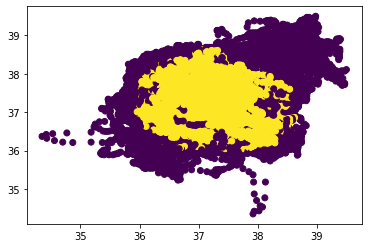

In [58]:
#plotting the scatterplot
plt.scatter(X[5001:,0],X[5001:,1], c = outliers)